# CS 6220 Data Mining — Assignment 6

# Regression

In [1]:
import pandas as pd

# Load the dataset from the URL
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin', 'Car Name']

# Read the dataset
df = pd.read_csv(url, sep=r'\s+', names=column_names, na_values='?')

# Drop rows with missing values
df.dropna(inplace=True)

# Display first few rows of the cleaned dataset
print(df.head())


    MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   

   Model Year  Origin                   Car Name  
0          70       1  chevrolet chevelle malibu  
1          70       1          buick skylark 320  
2          70       1         plymouth satellite  
3          70       1              amc rebel sst  
4          70       1                ford torino  


# Step 1

In [3]:
from sklearn.model_selection import train_test_split

# Selecting features and target variable
X = df[['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']]
y = df['MPG']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of training and test sets to verify the split
print(f"Training set size: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing set size: X_test: {X_test.shape}, y_test: {y_test.shape}")


Training set size: X_train: (313, 7), y_train: (313,)
Testing set size: X_test: (79, 7), y_test: (79,)


# Step 2(a)

In [5]:
from sklearn.linear_model import LinearRegression

# Create and train the linear regression model
regr = LinearRegression()
regr.fit(X_train, y_train)

# Display model coefficients and intercept
print("Model Coefficients:", regr.coef_)
print("Model Intercept:", regr.intercept_)


Model Coefficients: [-0.34578883  0.01510871 -0.02130175 -0.00614163  0.03795001  0.76774258
  1.61345707]
Model Intercept: -18.499361128724875


# Step 2(b)

In [7]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# Report the model coefficients
print("Model Coefficients:", regr.coef_)

# Calculate and print the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: %.2f" % mse)

# Calculate and print the variance score (R^2 score)
variance_score = r2_score(y_test, y_pred)
print('Variance Score (R^2): %.2f' % variance_score)


Model Coefficients: [-0.34578883  0.01510871 -0.02130175 -0.00614163  0.03795001  0.76774258
  1.61345707]
Mean Squared Error: 10.71
Variance Score (R^2): 0.79


# Step 3(a)

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Features to be used individually
features = ['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']

# Loop over each feature and train the model individually
for feature in features:
    # Select the current feature
    X_train_feature = X_train[[feature]]
    X_test_feature = X_test[[feature]]

    # Create and train the model
    regr = LinearRegression()
    regr.fit(X_train_feature, y_train)

    # Make predictions on the test set
    y_pred = regr.predict(X_test_feature)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    variance_score = r2_score(y_test, y_pred)

    # Print results for the feature
    print(f"\nFeature: {feature}")
    print(f"Coefficient: {regr.coef_[0]}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Variance Score (R^2): {variance_score:.2f}")



Feature: Cylinders
Coefficient: -3.652154589303544
Mean Squared Error: 21.81
Variance Score (R^2): 0.57

Feature: Displacement
Coefficient: -0.062227556495013804
Mean Squared Error: 21.23
Variance Score (R^2): 0.58

Feature: Horsepower
Coefficient: -0.16259724322918448
Mean Squared Error: 22.15
Variance Score (R^2): 0.57

Feature: Weight
Coefficient: -0.007903610385225607
Mean Squared Error: 17.69
Variance Score (R^2): 0.65

Feature: Acceleration
Coefficient: 1.1634207761239534
Mean Squared Error: 40.07
Variance Score (R^2): 0.21

Feature: Model Year
Coefficient: 1.2941115082756993
Mean Squared Error: 37.42
Variance Score (R^2): 0.27

Feature: Origin
Coefficient: 5.609299949704492
Mean Squared Error: 36.56
Variance Score (R^2): 0.28


# Step 3(b)


Feature: Cylinders
Coefficient: -3.652154589303544
Mean Squared Error: 21.81
Variance Score (R^2): 0.57


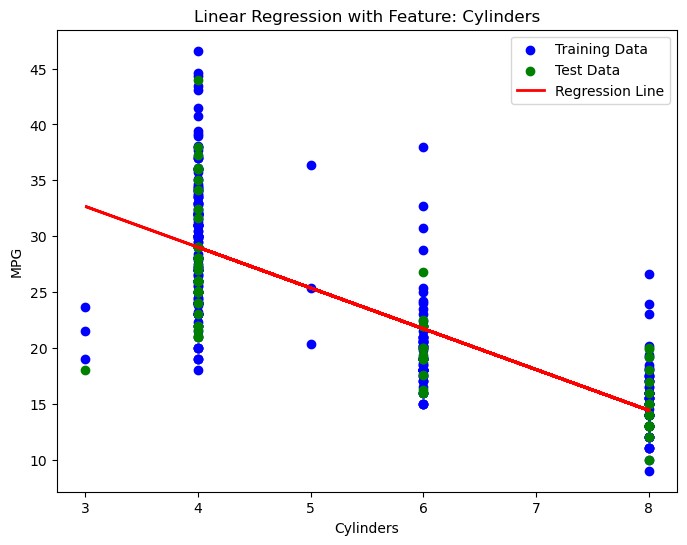


Feature: Displacement
Coefficient: -0.062227556495013804
Mean Squared Error: 21.23
Variance Score (R^2): 0.58


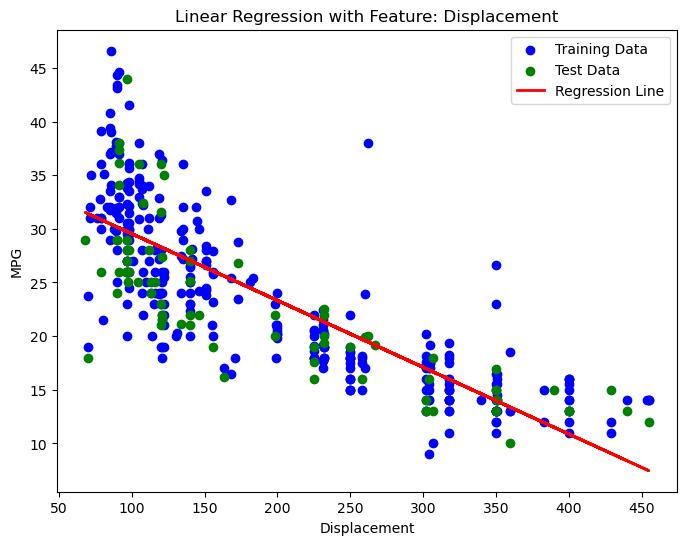


Feature: Horsepower
Coefficient: -0.16259724322918448
Mean Squared Error: 22.15
Variance Score (R^2): 0.57


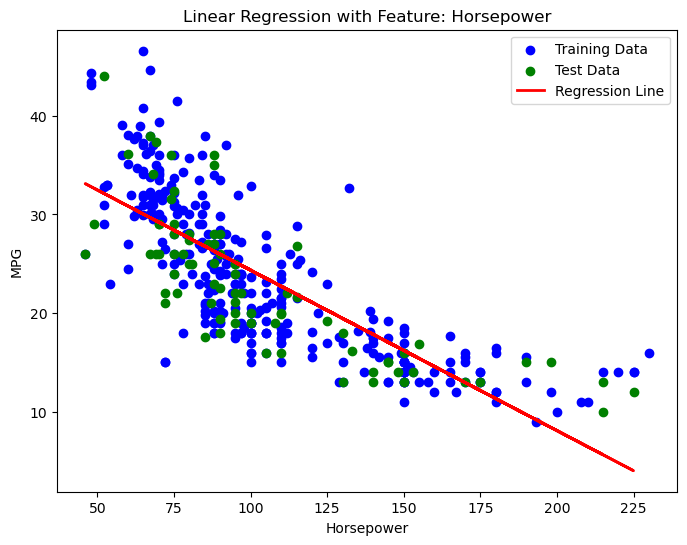


Feature: Weight
Coefficient: -0.007903610385225607
Mean Squared Error: 17.69
Variance Score (R^2): 0.65


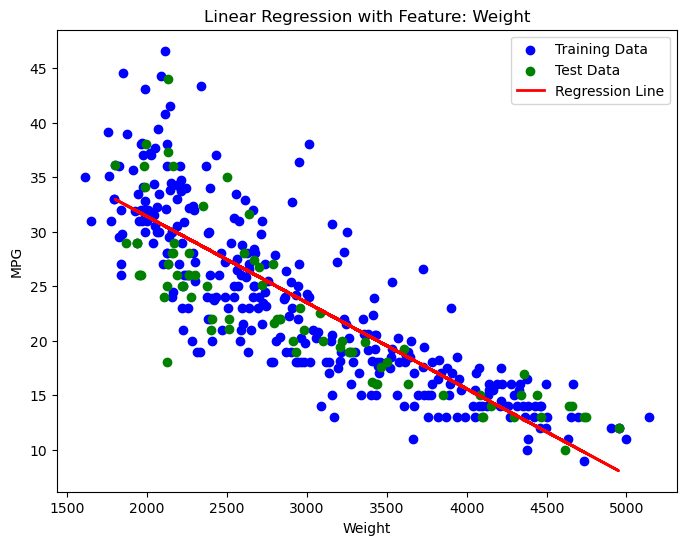


Feature: Acceleration
Coefficient: 1.1634207761239534
Mean Squared Error: 40.07
Variance Score (R^2): 0.21


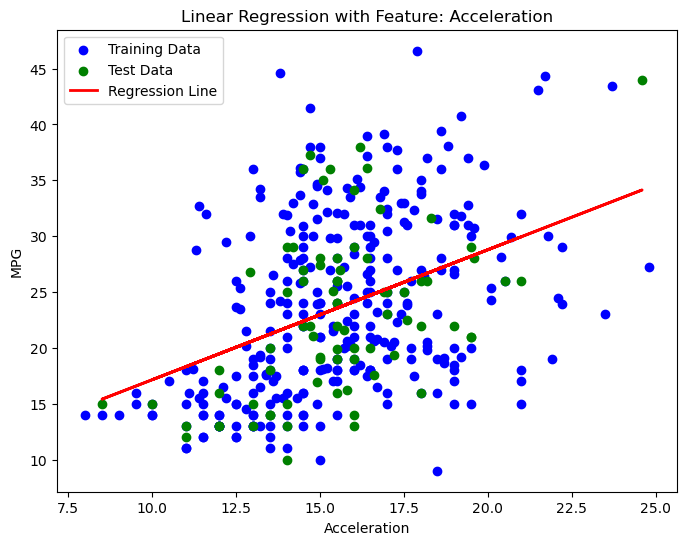


Feature: Model Year
Coefficient: 1.2941115082756993
Mean Squared Error: 37.42
Variance Score (R^2): 0.27


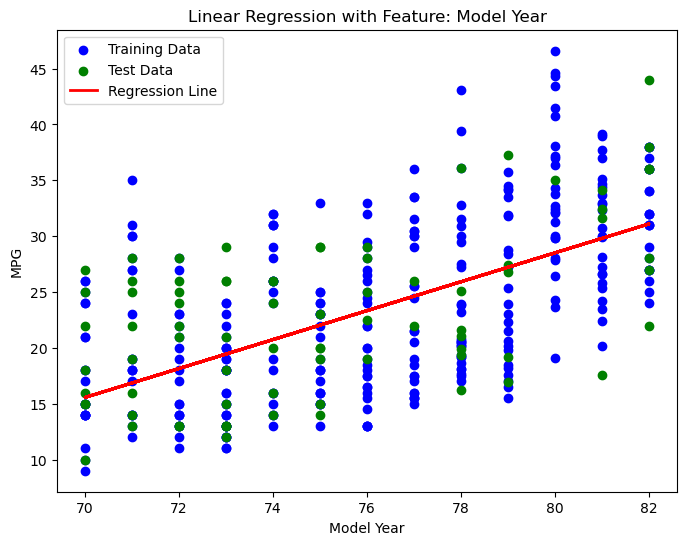


Feature: Origin
Coefficient: 5.609299949704492
Mean Squared Error: 36.56
Variance Score (R^2): 0.28


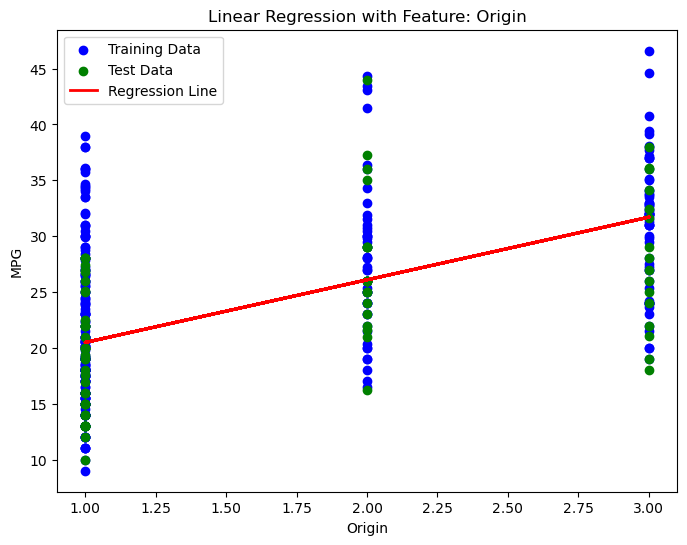

In [12]:
import matplotlib.pyplot as plt

# Features to be used individually
features = ['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']

# Loop over each feature and train the model individually
for feature in features:
    # Select the current feature
    X_train_feature = X_train[[feature]]
    X_test_feature = X_test[[feature]]

    # Create and train the model
    regr = LinearRegression()
    regr.fit(X_train_feature, y_train)

    # Make predictions on the test set
    y_pred = regr.predict(X_test_feature)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    variance_score = r2_score(y_test, y_pred)

    # Print results for the feature
    print(f"\nFeature: {feature}")
    print(f"Coefficient: {regr.coef_[0]}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Variance Score (R^2): {variance_score:.2f}")

    # Plot the training points, test points, and regression line
    plt.figure(figsize=(8, 6))
    plt.scatter(X_train_feature, y_train, color='blue', label='Training Data')
    plt.scatter(X_test_feature, y_test, color='green', label='Test Data')
    plt.plot(X_test_feature, y_pred, color='red', linewidth=2, label='Regression Line')
    plt.xlabel(feature)
    plt.ylabel('MPG')
    plt.title(f'Linear Regression with Feature: {feature}')
    plt.legend()
    plt.show()


# Step 4(a)

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Features to be used
features = ['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']

# Store metrics for each iteration
all_features_metrics = []
individual_feature_metrics = {feature: [] for feature in features}

# Perform 10 iterations
for i in range(10):
    # Step 1: Split the data into training and testing sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    # Step 2(a): Use all features to fit the model
    regr = LinearRegression()
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)

    # Collect metrics for the model with all features
    mse_all = mean_squared_error(y_test, y_pred)
    variance_score_all = r2_score(y_test, y_pred)
    all_features_metrics.append((mse_all, variance_score_all))

    # Step 3(a): Use each feature alone to fit the model
    for feature in features:
        X_train_feature = X_train[[feature]]
        X_test_feature = X_test[[feature]]

        # Create and train the model
        regr = LinearRegression()
        regr.fit(X_train_feature, y_train)

        # Make predictions
        y_pred = regr.predict(X_test_feature)

        # Collect metrics for the individual feature model
        mse = mean_squared_error(y_test, y_pred)
        variance_score = r2_score(y_test, y_pred)
        individual_feature_metrics[feature].append((mse, variance_score))

# Display collected metrics for all features
print("\nMetrics for model using all features (10 iterations):")
for i, (mse, variance_score) in enumerate(all_features_metrics):
    print(f"Iteration {i+1}: Mean Squared Error: {mse:.2f}, Variance Score (R^2): {variance_score:.2f}")

# Display collected metrics for each individual feature
for feature in features:
    print(f"\nMetrics for model using feature '{feature}' (10 iterations):")
    for i, (mse, variance_score) in enumerate(individual_feature_metrics[feature]):
        print(f"Iteration {i+1}: Mean Squared Error: {mse:.2f}, Variance Score (R^2): {variance_score:.2f}")



Metrics for model using all features (10 iterations):
Iteration 1: Mean Squared Error: 10.17, Variance Score (R^2): 0.84
Iteration 2: Mean Squared Error: 12.02, Variance Score (R^2): 0.83
Iteration 3: Mean Squared Error: 11.67, Variance Score (R^2): 0.79
Iteration 4: Mean Squared Error: 13.04, Variance Score (R^2): 0.79
Iteration 5: Mean Squared Error: 10.71, Variance Score (R^2): 0.84
Iteration 6: Mean Squared Error: 17.01, Variance Score (R^2): 0.77
Iteration 7: Mean Squared Error: 10.15, Variance Score (R^2): 0.83
Iteration 8: Mean Squared Error: 10.78, Variance Score (R^2): 0.81
Iteration 9: Mean Squared Error: 10.79, Variance Score (R^2): 0.81
Iteration 10: Mean Squared Error: 11.03, Variance Score (R^2): 0.82

Metrics for model using feature 'Cylinders' (10 iterations):
Iteration 1: Mean Squared Error: 22.10, Variance Score (R^2): 0.64
Iteration 2: Mean Squared Error: 24.96, Variance Score (R^2): 0.64
Iteration 3: Mean Squared Error: 23.51, Variance Score (R^2): 0.58
Iteration 4

# Step 4(b)

In [18]:
# Calculate average metrics for all features and each individual feature over 10 iterations
all_features_avg_mse = np.mean([mse for mse, _ in all_features_metrics])
all_features_avg_r2 = np.mean([r2 for _, r2 in all_features_metrics])

individual_features_avg_mse = {}
individual_features_avg_r2 = {}

for feature in features:
    mse_values = [mse for mse, _ in individual_feature_metrics[feature]]
    r2_values = [r2 for _, r2 in individual_feature_metrics[feature]]
    individual_features_avg_mse[feature] = np.mean(mse_values)
    individual_features_avg_r2[feature] = np.mean(r2_values)

# Print the average metrics for each feature
print("\nAverage Metrics for Model Using All Features:")
print(f"Mean Squared Error (MSE): {all_features_avg_mse:.2f}")
print(f"Variance Score (R^2): {all_features_avg_r2:.2f}")

for feature in features:
    print(f"\nAverage Metrics for Feature '{feature}':")
    print(f"Mean Squared Error (MSE): {individual_features_avg_mse[feature]:.2f}")
    print(f"Variance Score (R^2): {individual_features_avg_r2[feature]:.2f}")



Average Metrics for Model Using All Features:
Mean Squared Error (MSE): 11.74
Variance Score (R^2): 0.81

Average Metrics for Feature 'Cylinders':
Mean Squared Error (MSE): 23.44
Variance Score (R^2): 0.62

Average Metrics for Feature 'Displacement':
Mean Squared Error (MSE): 20.52
Variance Score (R^2): 0.67

Average Metrics for Feature 'Horsepower':
Mean Squared Error (MSE): 23.62
Variance Score (R^2): 0.62

Average Metrics for Feature 'Weight':
Mean Squared Error (MSE): 18.74
Variance Score (R^2): 0.70

Average Metrics for Feature 'Acceleration':
Mean Squared Error (MSE): 51.19
Variance Score (R^2): 0.18

Average Metrics for Feature 'Model Year':
Mean Squared Error (MSE): 44.43
Variance Score (R^2): 0.28

Average Metrics for Feature 'Origin':
Mean Squared Error (MSE): 45.96
Variance Score (R^2): 0.26


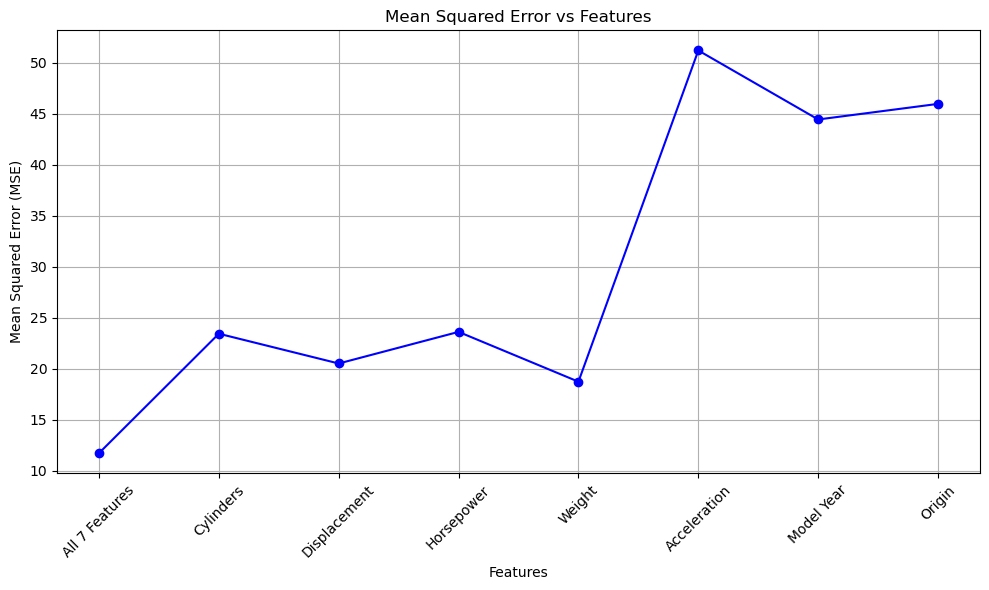

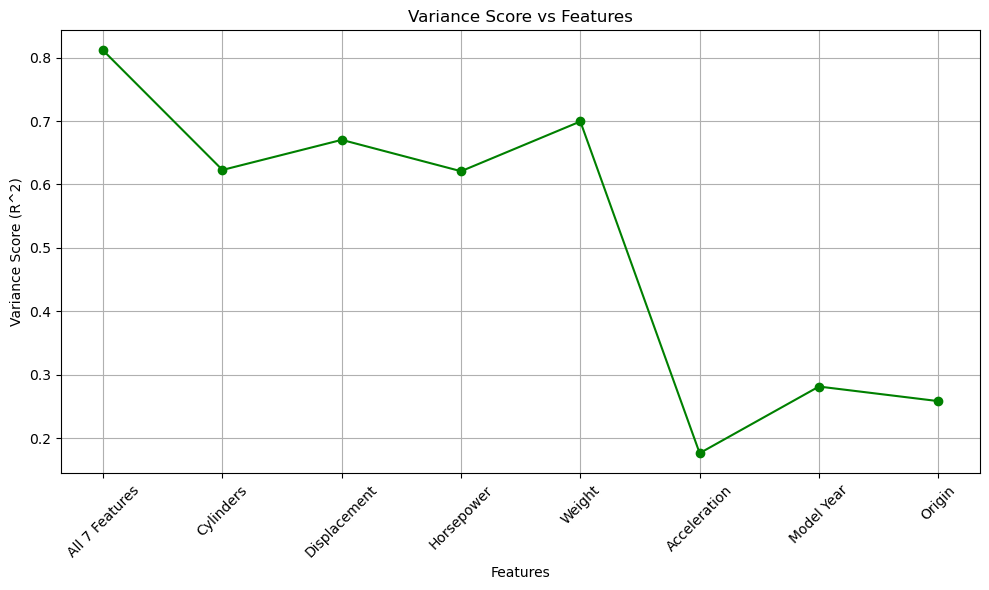

In [20]:
import matplotlib.pyplot as plt

# Prepare data for plotting
features_labels = ['All 7 Features'] + features
avg_mse_values = [all_features_avg_mse] + [individual_features_avg_mse[feature] for feature in features]
avg_r2_values = [all_features_avg_r2] + [individual_features_avg_r2[feature] for feature in features]

# Plot Mean Squared Error vs Features
plt.figure(figsize=(10, 6))
plt.plot(range(len(features_labels)), avg_mse_values, marker='o', linestyle='-', color='b')
plt.xticks(range(len(features_labels)), features_labels, rotation=45)
plt.xlabel('Features')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error vs Features')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Variance Score (R^2) vs Features
plt.figure(figsize=(10, 6))
plt.plot(range(len(features_labels)), avg_r2_values, marker='o', linestyle='-', color='g')
plt.xticks(range(len(features_labels)), features_labels, rotation=45)
plt.xlabel('Features')
plt.ylabel('Variance Score (R^2)')
plt.title('Variance Score vs Features')
plt.grid(True)
plt.tight_layout()
plt.show()


# Given this output, respond to the following questions:
# 1. Based upon the linear models you generated, which feature appears to be most  predictive for the target feature? Note that you can answer this question based upon the output provided for the linear models.

Based on the linear models generated and the outputs provided, Weight appears to be the most predictive feature for the target variable MPG.

1. Mean Squared Error (MSE):
* Among all the individual features, Weight consistently had the lowest MSE (average MSE: 18.74). Lower MSE indicates that the predictions from the linear model are closer to the actual values, suggesting that Weight is a strong predictor.

2. Variance Score (R²):
* Weight had the highest R² value (average R²: 0.70) among the individual features. The R² score measures how much of the variance in the target variable (MPG) can be explained by the feature. A higher R² value indicates better explanatory power.

3. Comparison with Other Features:
* Other features, such as Acceleration, Model Year, and Origin, had significantly higher MSE and lower R² values, which indicates that they are weaker predictors of MPG.
* Displacement also showed reasonably good predictive power, but Weight consistently performed better.

In conclusion, Weight is the most predictive feature for MPG based on both the Mean Squared Error and Variance Score (R²) metrics, which indicates its strong relationship with fuel efficiency.

# 2. Suppose you need to select two features for a linear regression model to predict the target feature. Which two features would you select? Why?

Based on the metrics and analysis of the linear models, I would select Weight and Displacement as the two features for a linear regression model to predict the target feature MPG.

Reasons for Selecting Weight and Displacement:

1. Predictive Power (MSE and R² Scores):
* Weight: Weight had the lowest average Mean Squared Error (MSE) (18.74) and the highest average Variance Score (R²) (0.70) among the individual features. This indicates that Weight is a strong predictor of MPG and has a significant linear relationship with it.
* Displacement: Displacement had an average MSE of 20.52 and an R² score of 0.67, making it the second-best performing feature after Weight. This suggests that Displacement also has a strong relationship with MPG and can help further explain the variance in the target.

2. Minimizing Error:
* Weight and Displacement together would likely capture the key factors affecting MPG because both are related to the size and power of the vehicle. Combining them in the model would help minimize prediction errors compared to using just one of the features.

3. Complementary Information:
* Weight and Displacement provide complementary information about a vehicle’s characteristics: Weight affects the energy required to move the vehicle, impacting fuel efficiency. Displacement relates to the engine size and power output, which also influences MPG.
* Including both features would likely improve the model's ability to capture the complex relationship between the vehicle’s physical characteristics and its fuel efficiency.

In conclusion, using Weight and Displacement as features for a linear regression model is likely to result in a more accurate prediction of MPG due to their strong individual performance and complementary roles in determining fuel efficiency.

# 3. Examine all the plots and numbers you have, do you have any comments on them? Do you find any surprising trends? Do you have any idea about what might be causing this surprising trend in the data? This is a descriptive question meant to encourage you to interpret your results and express yourself.

Upon examining the plots and metrics, here are some comments and observations:
Comments on the Plots and Metrics:

1. All Features vs. Individual Features:
* The model that used all features consistently performed better than models using individual features. This was evident in both the Mean Squared Error (MSE) and Variance Score (R²) plots, where the all features model had the lowest MSE and highest R² values. This suggests that the combination of features provides a more complete understanding of the factors affecting fuel efficiency.
  
2. Strong Predictor: Weight:
* Among individual features, Weight stands out as the best predictor of MPG, having the lowest average MSE and highest R². This aligns with intuition because the weight of a vehicle has a significant impact on how much energy is required for movement, directly affecting fuel consumption.

2. Weak Predictors: Acceleration, Model Year, and Origin:
* Acceleration, Model Year, and Origin had the highest MSE values and the lowest R² scores, making them weak predictors of MPG. This suggests that these features alone do not provide enough information to accurately predict fuel efficiency.
* Acceleration: The weak performance of acceleration is interesting. One possible explanation is that acceleration can vary significantly based on engine characteristics and driving conditions, making it less directly related to MPG.
* Model Year: The Model Year feature might contribute to some trends (e.g., newer cars being more efficient), but alone, it does not provide detailed information about the car's characteristics.
* Origin: The Origin feature may be indicative of certain design standards based on the region, but it does not provide direct, quantifiable information about fuel efficiency.

4. Surprising Trend: Acceleration's Low Predictive Power:
* It was somewhat surprising to see that Acceleration had such low predictive power. Intuitively, one might expect acceleration to correlate with engine power, and thus influence MPG. However, the data suggests otherwise, which could be due to a few reasons:
* Multicollinearity: Acceleration might be influenced by other features like Horsepower and Weight, making it less impactful when considered alone.
* Non-Linear Relationship: There may be a non-linear relationship between Acceleration and MPG that is not well-captured by linear regression.

5. Model Year's Limited Contribution:
* Model Year is another interesting case. While newer cars are generally more fuel-efficient due to advancements in technology, this feature alone does not fully explain the variance in MPG. This could be because other attributes, such as engine type, weight, and displacement, provide more direct influences on fuel efficiency than simply the year of manufacture.

Summary:
* Weight emerged as the most important predictor, with Displacement also showing strong predictive power.
* Acceleration, Model Year, and Origin were surprisingly weak predictors, possibly due to their indirect relationship with MPG or the existence of multicollinearity.
* The combination of all features provided the best predictive power, which suggests that each feature adds value when considered in conjunction with the others, capturing different aspects of the vehicle that contribute to fuel efficiency.